# Penguins Classification 
We train several classifiers using the same training pipeline and compare their performance.


In [1]:
%matplotlib inline

import plotly.io as pio
pio.renderers.default = "svg"


In [2]:
import sys
sys.path.append('../src')

In [3]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

from model import train_and_evaluate


In [4]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
)

In [5]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
df.dropna(inplace=True)

In [7]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['island'] = le.fit_transform(df['island'])
df['species'] = le.fit_transform(df['species'])

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [8]:
X = df.drop('species', axis=1)
y = df['species']   

### Train and Evaluate Multiple Models
We use the same function to train different classifiers and visualize their confusion matrices.


In [9]:
label_ids = list(range(len(le.classes_))) 
label_names = list(le.classes_)   

In [10]:
print(label_ids, label_names)

[0, 1, 2] ['Adelie', 'Chinstrap', 'Gentoo']



Training Logistic Regression...


c:\Users\Rubah\OneDrive\سطح المكتب\MLmodels\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning:

lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



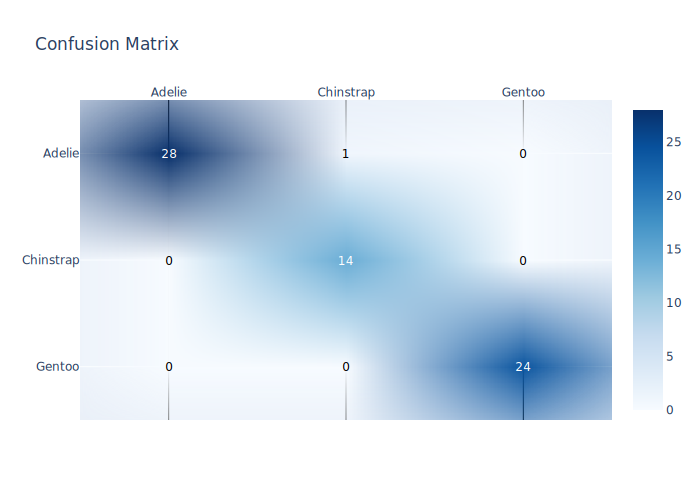


Training Random Forest...


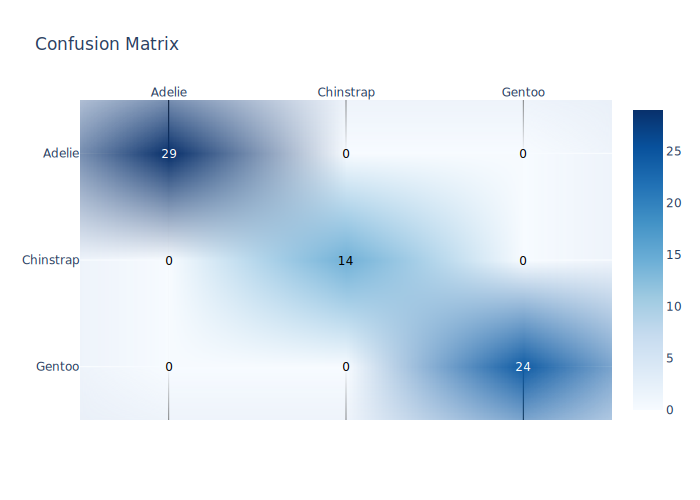


Training SVM...


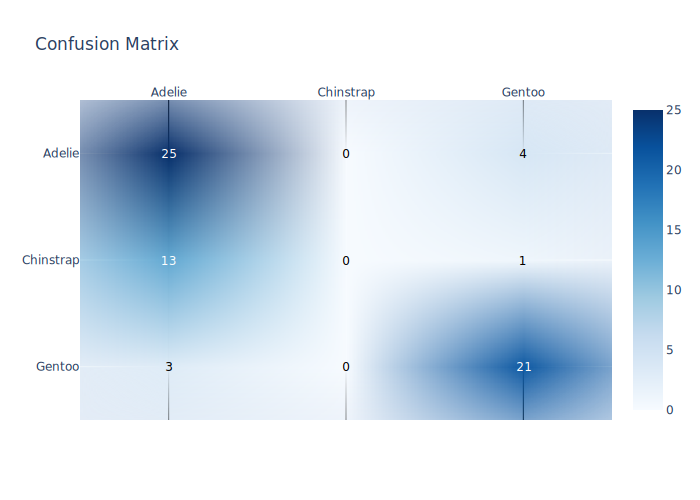


Training Baseline...


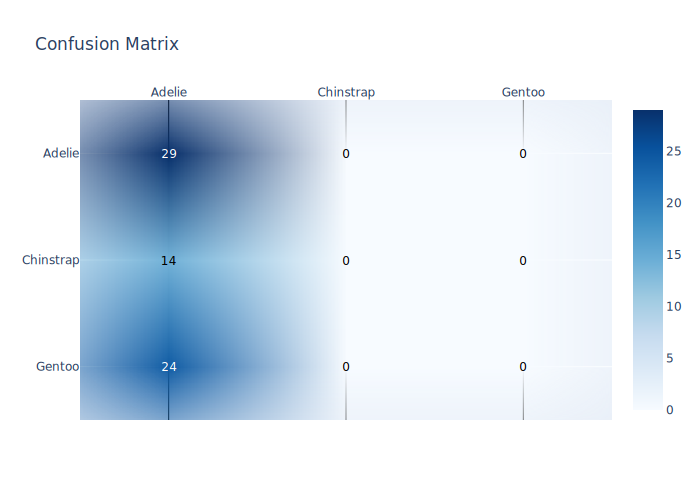

In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Baseline": DummyClassifier(strategy="most_frequent")
}

metrics_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    metrics = train_and_evaluate(
        model,
        X,
        y,
        task="classification",
        labels=label_ids,          
        class_names=label_names,  
        plot=True
    )
    metrics_results[name] = metrics

In [12]:
metrics = pd.DataFrame(metrics_results)

In [13]:
metrics

,Logistic Regression,Random Forest,SVM,Baseline
Accuracy,0.985075,1.0,0.686567,0.432836
Precision,0.986070,1.0,0.553247,0.187347
Recall,0.985075,1.0,0.686567,0.432836
F1 Score,0.985201,1.0,0.610064,0.261505


In [14]:
import os
from joblib import dump

os.makedirs("models", exist_ok=True)

best_model_name = 'Random Forest'
best_model = models[best_model_name]
best_model_name = 'Random Forest_penguins'
model_path = f"models/{best_model_name.replace(' ', '_')}.joblib"
dump(best_model, model_path)

print(f"Saved {best_model_name} as '{model_path}'")


Saved Random Forest_penguins as 'models/Random_Forest_penguins.joblib'
